## R Package ‘selectiveInference’ -September 7, 2019

## 📖Sparse Networks from Scratch
https://qiita.com/chobaken/items/0d7e440aff2203bac0e8

- sparse learning...「Scratchから疎なネットワークを学習する」従来の疎なネットワークの学習手法としては、まずはじめに密なネットワークを学習・構築してから、重要な部分だけを残すという手法がほとんどでした。つまり、従来の手法では密なモデルの学習が必須であり、学習にかかる時間がネックでした。
- Sparse Learningは大きく分けて以下の三つの手順に分解されます。
 1. モデル全体に対する各レイヤの貢献度を計算する
 2. 貢献度の低いweightsを取り除く(Prune)
 3. 2で取り除いた分を再分配する(Redistribution)
 - sparse <-> dense
 
 - 貢献度＝「Error(損失)をWeigths(重み)で偏微分したもの」…偏微分＝「その重みの変化によって生じる損失の変化」ー＞これの絶対値が大きいほどその重みの貢献度は大きい(例　貢献度１００の重みは、重みの１の変化で損失を100変化させる影響力があるが、貢献度１の重みは、重みの１の変化で損失を１しか変化させる事ができません。)
 - 偏微分をそのまま貢献度に使うことは危うい。理由：確率的勾配降下法(SGD)では各ミニバッチにおいて偏微分の値が大小・正負で振動してしまうから。

## 📖Selective Inference for Sparse High-Order Interaction Models -2017津田先生
http://proceedings.mlr.press/v70/suzumura17a/suzumura17a.pdf
- Lee et al. 2016 https://arxiv.org/pdf/1311.6238.pdf
- Lee & Tayler 2014 https://pdfs.semanticscholar.org/39a4/a6fd8033b361ce31628c94119bb83e834040.pdf
- Fithian et al. 2015 https://arxiv.org/pdf/1512.02565.pdf
- Tian & Taylor 2015 https://arxiv.org/pdf/1501.03588.pdf
- Taylor & Tibshirani 2016 https://arxiv.org/pdf/1602.07358.pdf
- Yang et al., 2016 https://arxiv.org/pdf/1607.08211.pdf
- Barber & Cande's  2016 https://statweb.stanford.edu/~candes/papers/HighDimKnockoffs.pdf

ここの方々みなさんCornell university（America）? カルフォルニア大学、スタンフォード大学

## 💻LARS(Least Angle Regression)アルゴリズム

- LARS(Least Angle Regression)は予測値と教師データとの偏差ベクトルとそれぞれの特徴量が基底となるベクトルとの角度が大きい(偏差との相関が大きい)ものとなるような特徴量を1つずつ追加していくというもの。

- 相関の大きい基底(特徴量)を加えていく際に、角度が小さくなるような(内積の値が大きくなるような)特徴量を選ぶというところからLeast Angle Regressionという名前がついているそう。

In [1]:
# 必要モジュールのインポート  
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets # データセットダウンロード用

In [2]:
diabetes = datasets.load_diabetes() # 糖尿病のデータセット
X = diabetes.data
y = diabetes.target

In [33]:
#y[:5]

In [38]:
#type(diabetes)
import pandas as pd
#pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [3]:
diabetes['feature_names'] #説明変数の紹介
# ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']  

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

<img src = '20190929191300.png'>

In [34]:
#diabetes.target

In [36]:
alphas, active, coefs = linear_model.lars_path(X, y, method='lars', verbose=True)  

.

In [5]:
coefs
#更新回数ごとの係数の値の変化。1つ1つの行がそれぞれの特徴量に対応する係数となっている。

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,  -10.01219782],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  -74.91651394, -111.97855446, -197.75650114,
        -226.13366183, -227.17579824, -239.81908937],
       [   0.        ,   60.11926965,  361.89461246,  434.75795962,
         505.65955847,  511.3480707 ,  512.04408899,  522.26484702,
         526.88546671,  526.39059435,  519.83978679],
       [   0.        ,    0.        ,    0.        ,   79.23644688,
         191.26988358,  234.15461616,  252.5270165 ,  297.15973689,
         314.38927158,  314.95046722,  324.39042769],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        , -103.94624877,
        -195.10582951, -237.34097312, -792.18416163],
       [   0.        ,    0.        ,    0.       

In [7]:
alphas  #それぞれのイテレーション時に計算された相関係数( ^C )が記録されている。

array([2.14804358, 2.01202713, 1.02466283, 0.71509967, 0.29441369,
       0.20086523, 0.15602991, 0.04520646, 0.01239247, 0.01151398,
       0.        ])

In [9]:
active  #それぞれのイテレーションで相関係数の値が最大となった係数のインデックスを表示している。

[2, 8, 3, 6, 1, 9, 4, 7, 5, 0]

In [10]:
xx = np.sum(np.abs(coefs.T), axis=1)  
xx /= xx[-1]

In [11]:
coefs.shape, xx.shape

((10, 11), (11,))

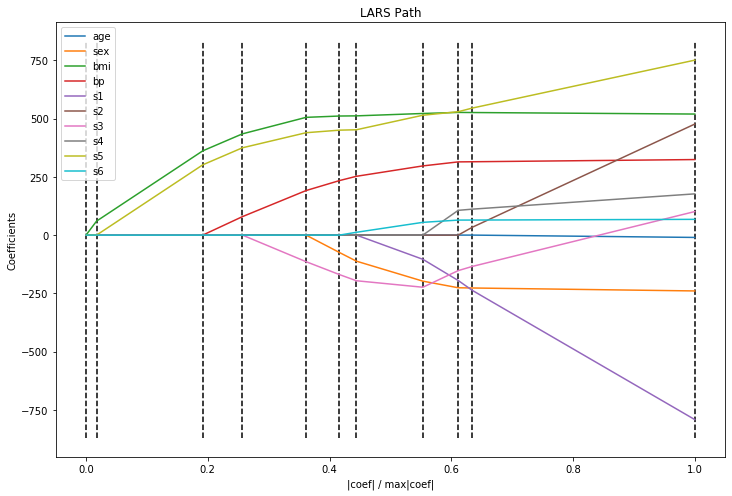

In [12]:
# それぞれのイテレーションにおける係数の大きさとそれぞれの係数の大きさのプロット
plt.figure(figsize=(12,8))
labels = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for i, label in enumerate(labels):
    plt.plot(xx, coefs[i], label=label)  
ymin, ymax = plt.ylim()  
plt.vlines(xx, ymin, ymax, linestyle='dashed')  
plt.xlabel('|coef| / max|coef|')  
plt.ylabel('Coefficients')
plt.title('LARS Path')
plt.axis('tight')
plt.legend()
plt.show()  

In [31]:
import numpy as np

a = np.loadtxt('sample.csv', delimiter=',', dtype='int64',
               skiprows=1, usecols=[1, 2, 3, 4, 5])

print(a) #TF1, 2, 3, 4, exの計5要素（列）。計15遺伝子サンプル（行）

[[1 1 1 0 1]
 [1 1 1 0 1]
 [1 0 0 1 0]
 [0 0 0 0 0]
 [1 1 1 0 1]
 [1 0 0 0 0]
 [1 1 1 1 1]
 [0 0 0 0 1]
 [0 1 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 1]
 [1 1 1 0 1]
 [0 0 0 0 0]]
